**Reconhecimento de gestos e ações**

O objetivo é encontrar pontos corporais. E então prever movimentos. Uma rede neural detectará os pontos. Tentar adivinhar o movimento.

Dataset: MPII -> detectar 15 pontos do corpo humano.

Rede VGG -> imagem de entrada -> convolução -> Maxpooling -> convolução.

MPII - pontos corporais
- 0 = cabeça;
- 1 = Pescoço;
- 2 = Ombro direito;
- 3 = Cotovelo direito;
- 4 = Pulso direito;
- 5 = Ombro esquerdo;
- 6 = Cotovelo esquerdo;
- 7 = Pulso esquerdo;
- 8 - Quadril direito;
- 9 = Joelho direito;
- 10 = Tornozelo direito;
- 11 = Quadril esquerdo;
- 12 = Joelho esquerdo;
- 13 = Tornozelo esquerdo;
- 14 = Peito;
- 15 = Fundo. 

Existe uma rede já treinada para realizar a detecção dos dados. A saída são os pontos juntamente com a localização.

In [ ]:
# Importação das bibliotecas
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


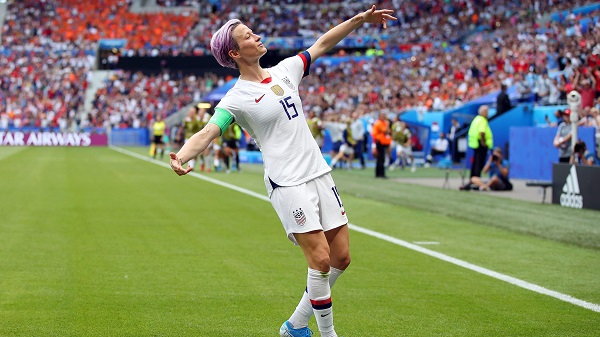

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Images/megan.jpg')

cv2_imshow(imagem)

In [ ]:
imagem.shape

(337, 600, 3)

In [ ]:
# qtd pixels
337 * 600 * 3

606600

In [ ]:
imagem_blob = cv2.dnn.blobFromImage(image = imagem, scalefactor = 1.0/255,
                                    size = (imagem.shape[1], imagem.shape[0])) # Mudando o tipo da imagem. A função a ser utilizada no OpenCV utiliza imagem no formato blob

In [ ]:
imagem_blob.shape # Qtd de imagens, canais de cor, altura, largura

(1, 3, 337, 600)

**Carregando a rede neural pré-treinada**

Rede implementada utilizando o Caffe Deep Learning framework

In [ ]:
rede = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Weights/pose_deploy_linevec_faster_4_stages.prototxt',
                                # Estrutura da rede neural
                                '/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Weights/pose_iter_160000.caffemodel' 
                                # Pesos da rede neural 
                                )

In [ ]:
rede.getLayerNames()

['conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [ ]:
len(rede.getLayerNames())

127

**Previsão dos pontos corporais**

In [ ]:
rede.setInput(imagem_blob)
saida = rede.forward() # Passa a imagem para a rede que passa por toda as camadas da rede

In [ ]:
saida.shape # Qtd de imagens, qtd de pontos detectados, localização x do ponto,  localização y do ponto 

(1, 44, 43, 75)

In [ ]:
largura = saida.shape[3]
altura = saida.shape[2]

In [ ]:
numero_pontos = 15 # Qtd de pontos detectados pela rede
pontos = []
threshold = 0.1
for i in range(0, numero_pontos):
  mapa_confianca = saida[0, i, :, :] # Confiança para cada ponto candidato

  # A rede é treinada com a imagem reduzida
  # Retonar o maior e o menor valor, bem como a localização
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca) # valor minimo, confiança valor máximo, relacionado ao valor minimo, localizaçã

  # Convertendo a escala da imagem que a rede retornou para a escala normal da imagem
  x = int((imagem.shape[1] * ponto[0]) / largura)
  y = int((imagem.shape[0] * ponto[1]) / altura)

  if confianca > threshold:
    cv2.circle(imagem, (x, y), 5, (0,255,0), thickness = -1)
    cv2.putText(imagem, f'{i}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    pontos.append((x, y))
  else:
    pontos.append(None)

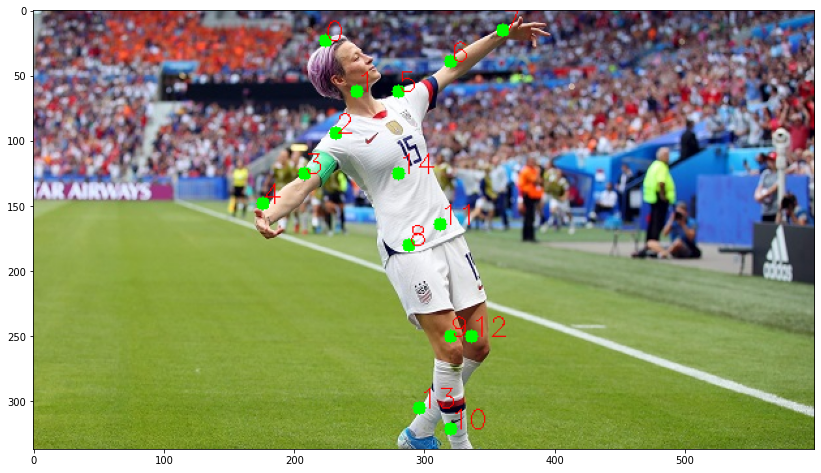

In [ ]:
plt.figure(figsize = (14,10))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB));

In [ ]:
# Desenho do esqueleto dos pontos detectados
pontos_conexoes = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13]]

In [ ]:
for conexao in pontos_conexoes:
  parteA = conexao[0]
  parteB = conexao[1]

  if pontos[parteA] and pontos[parteB]:
    cv2.line(imagem, pontos[parteA], pontos[parteB], (255,0,0))

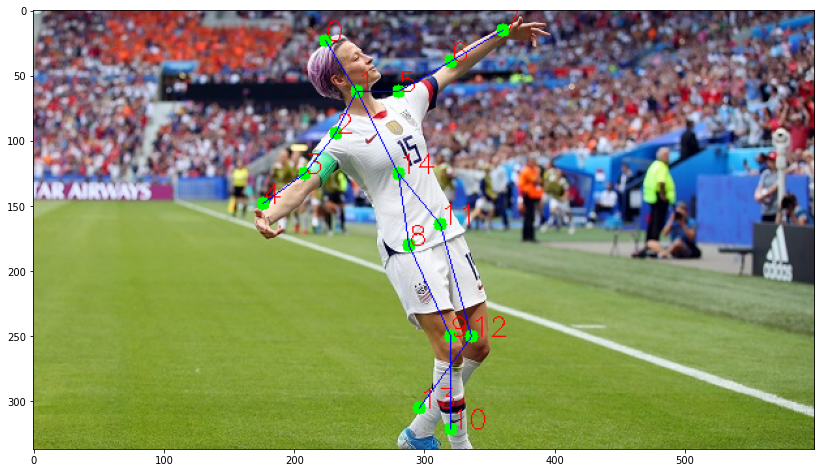

In [ ]:
plt.figure(figsize = (14,10))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB));

**Detecção de movimento**

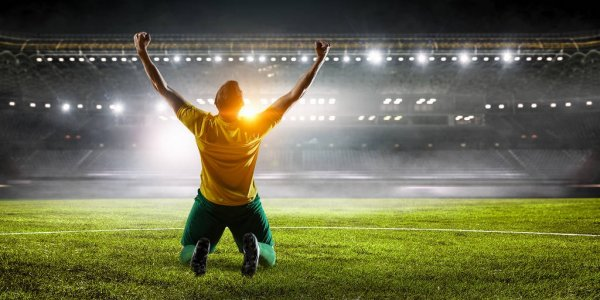

In [ ]:
imagem_mov = cv2.imread('/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Images/player.jpg')
cv2_imshow(imagem_mov)

**Detecção de movimentos**

Extração dos pontos -> verificação dos pontos

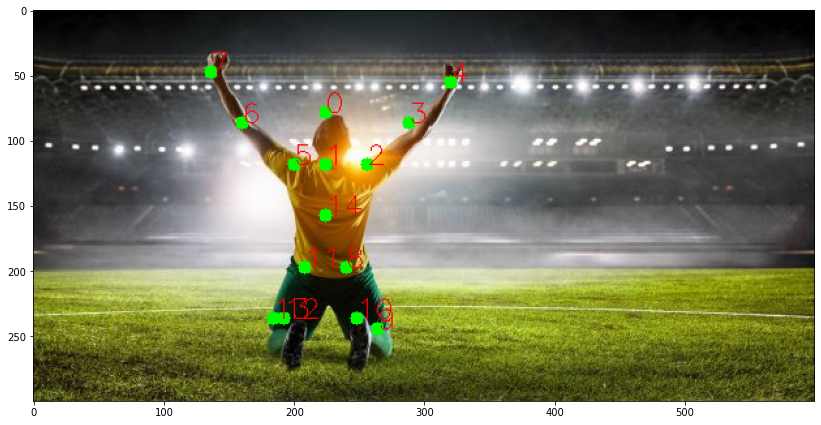

In [ ]:
# Carregamento da imagem
imagem_mov = cv2.imread('/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Images/player.jpg')

# Conversão da imagem 
imagem_blob_mov = cv2.dnn.blobFromImage(image = imagem_mov, scalefactor = 1.0/255,
                                    size = (imagem_mov.shape[1], imagem_mov.shape[0]))

# Rede
rede.setInput(imagem_blob_mov)
saida_mov = rede.forward()

# Processamento para exibição da imagem
largura_mov = saida_mov.shape[3]
altura_mov = saida_mov.shape[2]
numero_pontos = 15 # Qtd de pontos detectados pela rede
pontos = []
threshold = 0.1

for i in range(0, numero_pontos):
  mapa_confianca = saida_mov[0, i, :, :] # Confiança para cada ponto candidato

  # A rede é treinada com a imagem reduzida
  # Retonar o maior e o menor valor, bem como a localização
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca) # valor minimo, confiança valor máximo, relacionado ao valor minimo, localizaçã

  # Convertendo a escala da imagem que a rede retornou para a escala normal da imagem
  x = int((imagem_mov.shape[1] * ponto[0]) / largura_mov)
  y = int((imagem_mov.shape[0] * ponto[1]) / altura_mov)

  if confianca > threshold:
    cv2.circle(imagem_mov, (x, y), 5, (0,255,0), thickness = -1)
    cv2.putText(imagem_mov, f'{i}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    

    pontos.append((x, y))
  else:
    pontos.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(imagem_mov, cv2.COLOR_BGR2RGB));

In [ ]:
def verifica_bracos_levantados(pontos):
  # 0 = Cabeça
  # 4 = Pulso direito
  # 7 = Pulso esquerdo
  cabeca, pulso_direito, pulso_esquerdo = 0,0,0

  for i, ponto in enumerate(pontos):
    if i == 0:
      cabeca = ponto[1]
    elif i == 4:
      pulso_direito  = ponto[1]
    elif i == 7:
      pulso_esquerdo = ponto[1]

  return pulso_direito < cabeca and pulso_esquerdo < cabeca

In [ ]:
verifica_bracos_levantados(pontos)

True

**Detecção de movimentos em vídeo**

In [ ]:
video = '/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Videos/gesture1.mp4'
captura = cv2.VideoCapture(video)
conectado, frame = captura.read()

In [ ]:
resultado = '/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Videos/gesture1_resultado_lucas.mp4'
salvar_video = cv2.VideoWriter(resultado, cv2.VideoWriter_fourcc(*'XVID'), 10, (frame.shape[1], frame.shape[0]))

In [ ]:
frame.shape

(1080, 808, 3)

In [ ]:
threshold = 0.1
while cv2.waitKey(1) < 0:
  conectado, frame = captura.read()

  if not conectado:
    break
 
  imagem_blob_mov = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0/255, size = (256, 256))
  rede.setInput(imagem_blob_mov)
  saida_mov = rede.forward()
  largura_mov = saida_mov.shape[3]
  altura_mov = saida_mov.shape[2]

  numero_pontos = 15
  pontos = []

  # Processamentos da imagem para gerar os pontos
  for i in range(0, numero_pontos):
    mapa_confianca = saida_mov[0, i, :, :] 

    _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)

    x = int((frame.shape[1] * ponto[0]) / largura_mov)
    y = int((frame.shape[0] * ponto[1]) / altura_mov)

    if confianca > threshold:
      cv2.circle(frame, (x, y), 5, (0,255,0), thickness = -1)
      cv2.putText(frame, f'{i}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
      pontos.append((x, y))
    else:
      pontos.append(None)

  # Processamento das conexões para gerar o esqueleto
  for conexao in pontos_conexoes:
    parteA = conexao[0]
    parteB = conexao[1]

    if pontos[parteA] and pontos[parteB]:
      cv2.line(frame, pontos[parteA], pontos[parteB], (255,0,0))
  
  if verifica_bracos_levantados(pontos) and verificar_pernas_afastadas(pontos):
    cv2.putText(frame, 'Completo!', (50,200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))

  cv2_imshow(frame)
  salvar_video.write(frame)

salvar_video.release()
print('Concluído')


In [ ]:
# Carregamento da imagem
imagem_mov = cv2.imread('/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Images/jump.jpg')

# Conversão da imagem 
imagem_blob_mov = cv2.dnn.blobFromImage(image = imagem_mov, scalefactor = 1.0/255,
                                    size = (imagem_mov.shape[1], imagem_mov.shape[0]))

# Rede
rede.setInput(imagem_blob_mov)
saida_mov = rede.forward()

# Processamento para exibição da imagem
largura_mov = saida_mov.shape[3]
altura_mov = saida_mov.shape[2]
numero_pontos = 15 # Qtd de pontos detectados pela rede
pontos = []
threshold = 0.1

for i in range(0, numero_pontos):
  mapa_confianca = saida_mov[0, i, :, :] # Confiança para cada ponto candidato

  # A rede é treinada com a imagem reduzida
  # Retonar o maior e o menor valor, bem como a localização
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca) # valor minimo, confiança valor máximo, relacionado ao valor minimo, localizaçã

  # Convertendo a escala da imagem que a rede retornou para a escala normal da imagem
  x = int((imagem_mov.shape[1] * ponto[0]) / largura_mov)
  y = int((imagem_mov.shape[0] * ponto[1]) / altura_mov)

  if confianca > threshold:
    cv2.circle(imagem_mov, (x, y), 5, (0,255,0), thickness = -1)
    cv2.putText(imagem_mov, f'{i}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    pontos.append((x, y))
  else:
    pontos.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(imagem_mov, cv2.COLOR_BGR2RGB));

In [ ]:
def verificar_pernas_afastadas(pontos):
  # 11 = Quadril esquerdo
  # 8 = Quadril direito
  # 13 = Tornozelo esquerdo
  # 10 = Tornozelo direito
  quadril_esquerdo, quadril_direito = 0, 0
  tornozelo_esquerdo, tornozelo_direito = 0, 0

  for i, ponto in enumerate(pontos):
    if i == 11:
      quadril_esquerdo = ponto[0] 
    elif i == 8:
      quadril_direito = ponto[0] 
    elif i == 13:
      tornozelo_esquerdo = ponto[0] 
    elif i == 10:
      tornozelo_direito = ponto[0]
  
  return tornozelo_direito < quadril_direito and tornozelo_esquerdo > quadril_esquerdo

In [ ]:
verificar_pernas_afastadas(pontos)

True